## Anomaly Detection in Curriculum logs

Jess Gardin

Saroj Duwal

Lindy Castellaw

### Acquire/Wrangle

In [1]:
import env
import warnings
warnings.filterwarnings("ignore")
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd
import env
import wrangle 

In [2]:
df = wrangle.get_logs()

In [3]:
df, ds_df, web_df, staff_df = wrangle.prepare_log(df)
df.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,,,None,None
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,java-ii,None,None,None
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,java-ii,object-oriented-programming,None,None
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,slides,object_oriented_programming,None,None
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,javascript-i,conditionals,None,None


## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

#### - for Data Science Program

In [ ]:
# value counts with pages converted to dataframe
pd.DataFrame(ds_df[['page_1','page_2','page_3']].value_counts())

In [ ]:
# visualize  data science cohort pages/lessons visited

plt.figure(figsize=(20,10))
ds_df[['page_1','page_2','page_3']].value_counts().head(20).plot(kind='barh')

#### - for Web Developer Program

In [ ]:
# creating a dataframe with pages and count
pd.DataFrame(web_df[['page_1','page_2','page_3']].value_counts())

In [ ]:
# visualize for web devlopers by page
plt.figure(figsize=(20,10))
web_df[['page_1','page_2','page_3']].value_counts().head(20).plot(kind='barh')

### Takeaways from question 1
#### - Web Development Program most visited Lesson : "**working-with-data-types-operators-and-variables from Javscript-I Introduction** " 
#### - Data Science Program most visited Lesson : " ** creating-files-and-directories from Comand Line Interface(cli)  in Appendix"  





# 7. Which lessons are least accessed?


#### - for Data Science Program




In [ ]:
# plot pages for data science program with the bottom 30 observations
plt.figure(figsize=(20,10))
ds_df[['page_1','page_2','page_3']].value_counts().tail(30).plot(kind='barh')

In [ ]:
# creating a dtaframe with bottom 30 observations of the pages visited
pd.DataFrame(ds_df[['page_1','page_2','page_3']].value_counts().tail(30))

#### - for Web Developer Program

In [ ]:
# plot the bar chart for the bottom observations
plt.figure(figsize=(20,30))
web_df[['page_1','page_2','page_3']].value_counts().tail(70).plot(kind='barh')

In [ ]:
# creating a datframe  with the bottom observations
pd.DataFrame(web_df[['page_1','page_2','page_3']].value_counts().tail(60))

### Takeaways from Question 7
- least accessed lesson on Data Science program:" "
- least accessed lesson on Web Developer program:" "

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

#### - for unique Data Science Program Cohort

In [ ]:
# data science cohort unique names
ds_df.cohort_name.unique().tolist()

In [ ]:
# create a list for the unique data science cohort name
val= list(ds_df.cohort_name.unique())

# loop through each unique cohort name and barchart plot the top and bottom 15 observations
for x in val:
    print(f'Cohort : {x}')
    ds_sub_df= ds_df[ds_df.cohort_name== x]
    ds_sub_df[['page_1','page_2','page_3']].value_counts().head(15).plot(kind='barh')
    plt.show()
    ds_sub_df[['page_1','page_2','page_3']].value_counts().tail(15).plot(kind='barh')
    plt.ylabel=('page visited')
    plt.xlabel =( 'times visited') 
    plt.show()
    print('------------------------------------------------------------------')

#### - for unique Web Developer Program Cohort

In [ ]:
# web development unique cohort list
web_df.cohort_name.unique()

In [ ]:
#  web development cohort list
val= list(web_df.cohort_name.unique())

for x in val:
    print(f'Cohort : {x}')
    web_sub_df= web_df[web_df.cohort_name== x]
    web_sub_df[['page_1','page_2','page_3']].value_counts().head(15).plot(kind='barh')
    web_sub_df[['page_1','page_2','page_3']].value_counts().tail(15).plot(kind='barh')
    plt.ylabel=('page visited')
    plt.xlabel =( 'times visited') 
    plt.show()
    print('--------------------------------------------------------')

### Takeaways from Question no 2.
- 
- 

# 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [ ]:
# for data science students checking the web dev

# unique pages visited 
page= list(ds_df.endpoint.unique())

# list of unique pages in web dev
web_keyword = list(web_df.endpoint.unique())

# create a loop to cross check a page visited by ds students that matches with unique pages from web dev cohort

count= 0
lst=[]
for x in web_keyword:
    if x in page:
        print(x)
        
        count+= 1
        lst.append(x)
        
print(count)


In [ ]:
# web dev students visiting data science topics

# list of unique pages visited by web dev cohort
page = list(web_df.endpoint.unique())

# unique pages visited by data science cohort
ds_keyword = list(ds_df.endpoint.unique())

count= 0
cross_curr=[]
# loop
for x in ds_keyword:
    if x in page:
        print(x)
        
        count+= 1
        cross_curr.append(x)
        
print(count)


## Takeaways from Question no. 5
- Access to both curriculum s were not shut off
- It is evident that there is cross referencing curriculum between the Data Science and web Developer Programs

# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


Top five topics accessed for web dev after graduation:

1. '/' is homepage for web dev curriculum
2. 'javascript-i' front end language 
3. 'spring' back end framework for java
4. 'html-css' front end languages 
5. 'search_index.json' search in json

<AxesSubplot:ylabel='endpoint'>

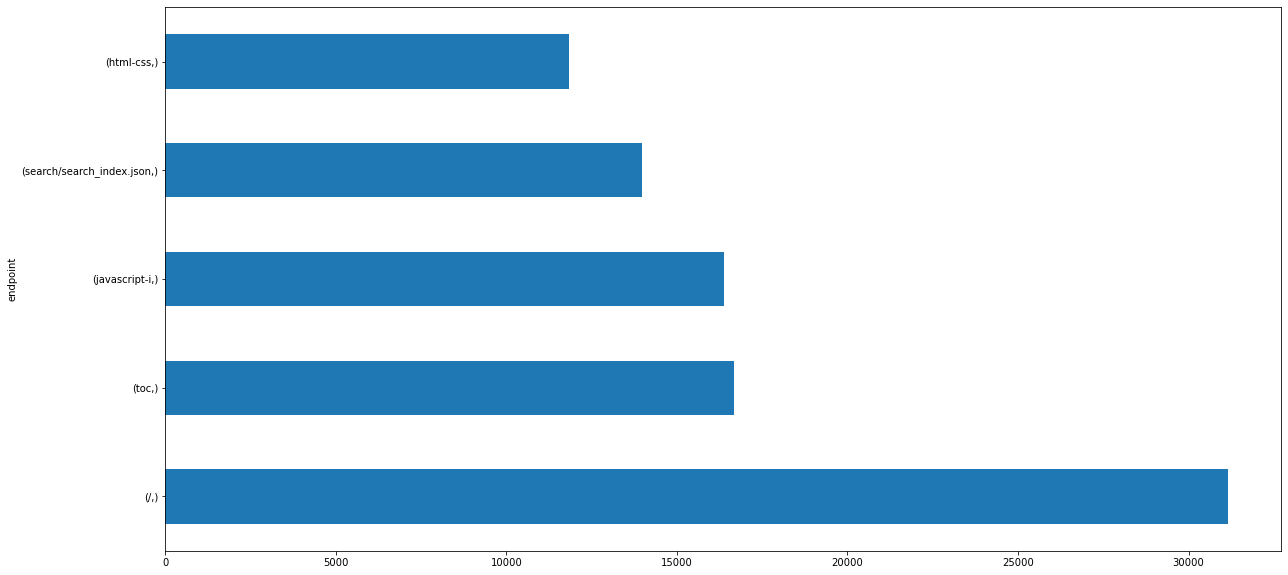

In [4]:
plt.figure(figsize=(20,10))
web_df[['endpoint']].value_counts().head().plot(kind='barh')

Top five topics accessed for Data Science after graduation:
1. '/' homepage for curriculum
2. 'search_index.json' search in json
3. 'mysql-overview' mysql intro lesson
4. 'classification/overview' classification intro lesson
5. 'scale_features_or_not.svg' scaling lesson

<AxesSubplot:ylabel='endpoint'>

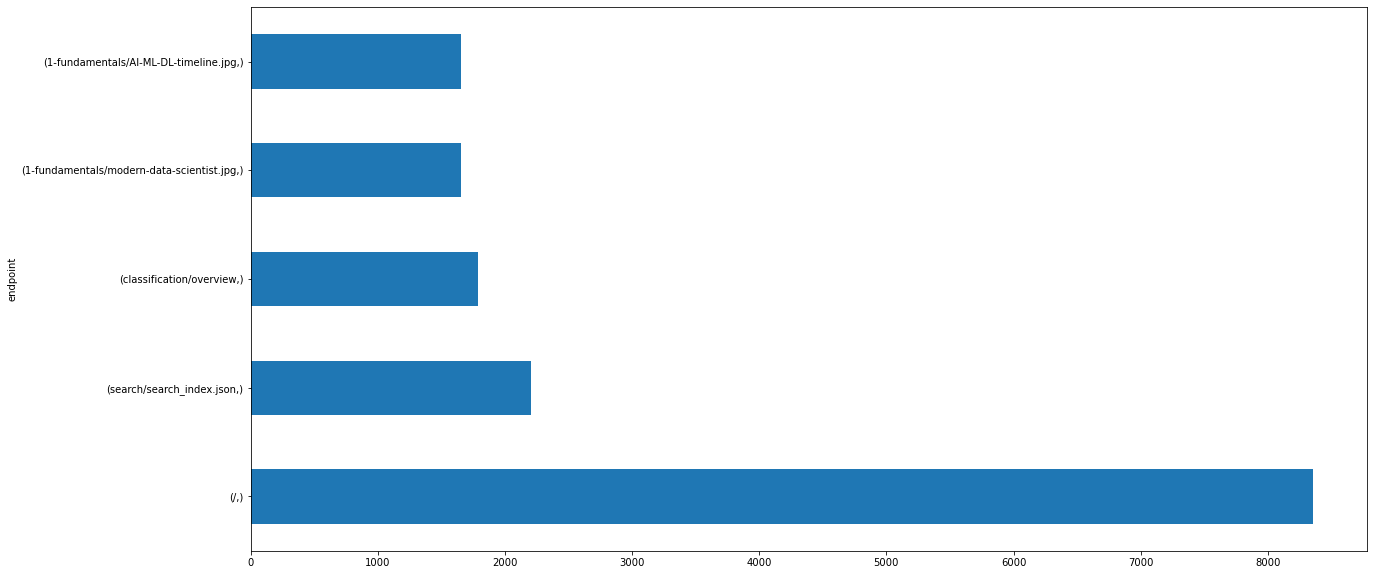

In [5]:
# for DS cohort
plt.figure(figsize=(20,10))
ds_df[['endpoint']].value_counts().head().plot(kind='barh')

# 4
Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

# Identify students who present anomalous activity using the Bollinger Band method. K = 3, span = 30.

In [ ]:
span = 30
weight = 3

anomalies = pd.DataFrame()
for u in list(df.user.unique()):
    user_df = fun_4.find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [ ]:
anomalies.shape

# Thats a lot of anomalies. 
Maybe we can narrow it down further

# Cohort name anomalies

In [ ]:
# Find all the users that don't have a cohort name assigned to them
coh_nam_na = df[df.cohort_name.isna()]

In [ ]:
# Identify all unique user id's 
coh_nam_na.user.unique();

# Looking for people with both individual user anomalies and no cohort name.

In [ ]:
# cross check usernames without a cohort agains usernames that show anomalies
sus_user = np.intersect1d(coh_nam_na.user.unique(),anomalies.user.unique())
sus_user

In [ ]:
fun_4.plot_bands_two(anomalies, list(sus_user))

# Same process for IP addresses

In [ ]:
span = 30
weight = 3

anomalies_ip = pd.DataFrame()
for u in list(df.source_ip.unique()):
    user_df_ip = fun_4.find_anomalies_ip(df, u, span, weight)
    anomalies_ip = pd.concat([anomalies_ip, user_df_ip], axis=0)

In [ ]:
anomalies_ip.head()

In [ ]:
anomalies_ip.source_ip.nunique()

# Thats a lot of anomalies. Cross reference with users lacking cohort names.

In [ ]:
anomalies_ip.pages_one_user.nunique()

In [ ]:
# lists the users who were using the ip address when the ip address was displaying suspicious behaviour
sus_ip = np.intersect1d(coh_nam_na.user.unique(),anomalies.pages_one_user.unique())
sus_ip

# Combine all three
- No Cohort Name 
AND
- Suspicious Individual User Data
AND
- Suspicious Source_IP Activity reported when User was using that IP adress 

In [ ]:
# Suspicious users:
sus = np.intersect1d(sus_user, sus_ip)
sus